In [81]:
import pandas as pd
import numpy as np


In [83]:
df_pro = pd.read_excel('prosci_clean_withpos.xlsx')



In [127]:
df_pro = df_pro.drop("Unnamed: 0", axis = "columns")


In [128]:
df_pro.head()

,Raceid,Saddle,Ability,Fitness,Conditions,Market,Rank,LastRan,LastWon,RunsSince,...,TForm,JForm,GreenShoes,AmberShoes,RedShoes,Tips,Select,Short,RPBlue,Position
0,481119,1,1.0,1.0,1.0,2.0,1.0,13,13,0,...,1,1,3,2,0,6.0,0,1,2,1
1,481119,2,2.0,2.0,1.0,2.0,3.0,13,77,6,...,1,1,1,3,1,3.0,1,1,2,0
2,481119,3,2.0,2.0,2.0,2.0,4.0,16,56,3,...,1,1,0,4,1,2.0,0,0,2,0
3,481119,4,3.0,2.0,3.0,3.0,7.0,6,217,4,...,1,1,0,0,5,0.0,0,0,1,0
4,481119,5,2.0,1.0,1.0,2.0,2.0,6,558,15,...,1,1,1,4,0,2.0,0,1,3,0


In [4]:
df_pro.describe()

,Unnamed: 0,LastRan,LastWon,RunsSince,HcapCount,OR,Last_OR,HWM,LastWM,Form,...,TForm,JForm,GreenShoes,AmberShoes,RedShoes,Tips,Select,Short,RPBlue,Position
count,34320.000000,34320.000000,34320.000000,34320.000000,34320.000000,34320.000000,34320.000000,34320.000000,34320.000000,34320.000000,...,34320.000000,34320.000000,34320.000000,34320.000000,34320.000000,33450.000000,34320.000000,34320.000000,34320.000000,34320.000000
mean,17159.500000,40.655216,158.686655,431.993502,6.003467,55.891812,49.662005,24.996795,24.423368,69.378089,...,0.971824,0.984499,0.914336,2.020862,1.927710,1.128759,0.098572,0.313986,1.453875,0.107372
std,9907.474956,71.064356,259.680658,492.075114,9.817901,37.821944,40.252972,38.280631,37.542330,41.369377,...,0.464534,0.442694,1.014538,1.216995,1.533199,1.969880,0.298091,0.464118,0.971144,0.309590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8579.750000,13.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,17159.500000,21.000000,19.000000,11.000000,2.000000,65.000000,60.000000,0.000000,0.000000,77.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,25739.250000,35.000000,276.000000,999.000000,8.000000,83.000000,80.000000,63.000000,61.000000,97.000000,...,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000,0.000000,1.000000,2.000000,0.000000
max,34319.000000,1459.000000,2879.000000,999.000000,95.000000,167.000000,168.000000,155.000000,155.000000,464.000000,...,2.000000,2.000000,5.000000,5.000000,5.000000,14.000000,1.000000,1.000000,3.000000,1.000000


In [10]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34320 entries, 0 to 34319
Columns: 198 entries, Unnamed: 0 to Position
dtypes: float64(98), int64(100)
memory usage: 51.8 MB


In [129]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


def load_or_clean(clean=False, binaryPositions = False):
    if clean:
        print("Loading and cleaning dirty data...")
        df_pro = pd.read_excel('prosci_clean.xlsx')
        df_pro = clean_df(df_pro, binaryPositions)
        print("Saving cleaned file...")
        df_pro.to_excel('prosci_clean.xlsx')
    else:
        print("Loading cleaned data...")
        df_pro = pd.read_excel('prosci_clean.xlsx')
    return df_pro


def clean_df(df_pro, binaryPositions = False):
    df_pro['Penalty'].fillna(0, inplace=True)
    cols = ["SameJockey","ORWinner","ORWins","ORPlaced","HighClassWin", "GradeWinner", 
            "TopRTypeJockey", "LastBestSpeed", "LastBestSpeed3", "LastBestForm",  "LastBestForm3",
            "FutureEntry", "LastTimeWin", "NewTrain", "Noted", "SameCourse", "SameCourse_2",
            "HighGradeWinner", "TopRTypeTrainer", "Select", "Short"]
    zeros = ["HWM", "Travelled", "LastWM", "MinOdds", "MaxOdds", "AvgOdds", "LastWon", 
                "HcapCount", "OR", "Last_OR", "Form", "Speed", "OddsPos", "Wins", "Runs",
                "HCrsWin", "HCrsRun", "HGngRun", "HDisWin", "HDisRun", "HClassWin", "HClassRun",
                "TCrseWin", "TCrseRun", "TRTypeWin", "TRTypeRun", "T14Win", "T14Run", "T30Win",
                "T30Run", "T60Win", "T60Run", "TJWin", "TJRun", "JCrseWin", "JCrseRun", "JRTypeWin",
                "JRTypeRun", "J14Win", "J14Run", "J30Run", "J60Win", "J60Run"]
    # df_pro.drop(df_pro[df_pro['Performance'] == 0].index, inplace=True)
    df_pro[cols] = df_pro[cols].replace({True: 1, False: 0})
    df_pro[zeros] = df_pro[zeros].replace({np.nan: 0})
    df_pro['ShrewdTrainer'].replace({'Y': 1, 'N': 0}, inplace=True)
    df_pro['Gambled'].replace({'G': 1, np.nan: 0}, inplace=True)
    df_pro['CatGradeWinner'].replace({'BOTH': 3, 'HIGH': 2, 'SAME': 1, np.nan: 0}, inplace=True)
    df_pro['WellHcap'].replace({'negative': 1, 'neutral': 2, 'positive': 3, 'empty': 0, np.nan: 0}, inplace=True)
    df_pro['CatClassWinner'].replace({'BOTH': 3, 'HIGH': 2, 'SAME': 1, np.nan: 0}, inplace=True)
    df_pro['TForm'].replace({'C': 0, 'N': 1, 'H': 2}, inplace=True)
    df_pro['JForm'].replace({'C': 0, 'N': 1, 'H': 2}, inplace=True)
    df_pro["Position"] = np.where(df_pro["Position"] != 1, 0, 1)
    # df_pro[df_pro.isna().any(axis=1)]
    if binaryPositions == True:
        df_pro.loc[df_pro["Position"] > 1, "Position"] = 0
    return df_pro


In [130]:
df_pro = clean_df(df_pro, binaryPositions = True)


In [131]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# def load_or_clean(clean=False):
#     if clean:
#         print("Loading and cleaning dirty data...")
#         df_pro = pd.read_excel('../data/prosci.xlsx')
#         df_pro['Penalty'].fillna(0, inplace=True)
#         cols = ["SameJockey","ORWinner","ORWins","ORPlaced","HighClassWin", "GradeWinner", 
#                 "TopRTypeJockey", "LastBestSpeed", "LastBestSpeed3", "LastBestForm",  "LastBestForm3",
#                 "FutureEntry", "LastTimeWin", "NewTrain", "Noted", "SameCourse", "SameCourse_2",
#                 "HighGradeWinner", "TopRTypeTrainer", "Select", "Short"]
#         zeros = ["HWM", "Travelled", "LastWM", "MinOdds", "MaxOdds", "AvgOdds", "LastWon", 
#                  "HcapCount", "OR", "Last_OR", "Form", "Speed", "OddsPos", "Wins", "Runs",
#                  "HCrsWin", "HCrsRun", "HGngRun", "HDisWin", "HDisRun", "HClassWin", "HClassRun",
#                  "TCrseWin", "TCrseRun", "TRTypeWin", "TRTypeRun", "T14Win", "T14Run", "T30Win",
#                  "T30Run", "T60Win", "T60Run", "TJWin", "TJRun", "JCrseWin", "JCrseRun", "JRTypeWin",
#                  "JRTypeRun", "J14Win", "J14Run", "J30Run", "J60Win", "J60Run"]
#         # df_pro.drop(df_pro[df_pro['Performance'] == 0].index, inplace=True)
#         df_pro[cols] = df_pro[cols].replace({True: 1, False: 0})
#         df_pro[zeros] = df_pro[zeros].replace({np.nan: 0})
#         df_pro['ShrewdTrainer'].replace({'Y': 1, 'N': 0}, inplace=True)
#         df_pro['CatGradeWinner'].replace({'BOTH': 3, 'HIGH': 2, 'SAME': 1, np.nan: 0}, inplace=True)
#         df_pro['WellHcap'].replace({'negative': 1, 'neutral': 2, 'positive': 3, 'empty': 0, np.nan: 0}, inplace=True)
#         df_pro['CatClassWinner'].replace({'BOTH': 3, 'HIGH': 2, 'SAME': 1, np.nan: 0}, inplace=True)
#         df_pro['TForm'].replace({'C': 0, 'N': 1, 'H': 2}, inplace=True)
#         df_pro['JForm'].replace({'C': 0, 'N': 1, 'H': 2}, inplace=True)
#         df_pro["Position"] = np.where(df_pro["Position"] != 1, 0, 1)
#         # df_pro[df_pro.isna().any(axis=1)]
#         print("Saving cleaned file...")
#         df_pro.to_excel('../data/prosci_clean.xlsx')
#     else:
#         print("Loading cleaned data...")
#         df_pro = pd.read_excel('../data/prosci_clean.xlsx')
#     return df_pro
        
USE_COLUMNS = [
    # 'LastRan', 'OR', 'Form', 'Last_OR', 'LastWM', 'Form', 'Speed', 'OddsPos', 'DecOdds',
    # 'MinOdds', 'MaxOdds', 'AvgOdds', 'MaxOdds',  'Runs', 'HCrsWin',  'HCrsRun', 'HGngWin',
    # 'HGngRun',  'HDisRun', 'HClassRun', 'HTotPrize', 'TCrseWin', 'TCrseRun', 'TRTypeWin',
    # 'TRTypeRun', 'T14Win', 'T14Win',  'T14Run', 'T30Win',  'T60Win', 'T60Run', 'TJWin',
    # 'TJRun',  'JAllow',  'JCrseWin', 'JCrseRun', 'JRTypeWin',  'JRTypeRun',  'J14Win',
    # 'J14Run', 'J30Win',  'J30Run', 'J30Run', 'J60Win', 'J60Run',  'OCrseWin',
    # 'OCrseRun', 'ORTypeWin', 'ORTypeWin', 'ORTypeRun', 'O14Win',  'O30Win', 'O30Run', 
    # 'O60Win', 'O60Run', 'SCrseWin', 'SCrseRun', 'SRTypeWin', 'SRTypeRun', 'S14Win', 'S14Run',
    # 'S30Win', 'S30Run', 'S60Win', 'S60Run', 'LastPerf', 'LastPerf_2', 'FormRank',
    # 'SpeedRank', 'ORRank', 'FormImproved', 'SpeedImproved', 'ORImproved',  'HHcapWin',
    # 'HHcapRun', 'JBreakWins',  'JBreakRuns', 'JDebutWins', 'JDebutRuns', 'JHGBackWins'
    # 'JHGBackRuns',  'JHGFirstWins',  'WeightRank', 'WeightRank', 'SameJockey', 'ORWinner', 
    # 'ORWins',  'ORPlaced', 'ORPlaces', 'HighClassWin', 'GradeWinner', 'HighGradeWinner',
    # 'TopRTypeJockey', 'HighGradeWinner', 'ShrewdTrainer', 'TopRTypeTrainer', 'BrkRuns', 
    # 'NewTrain', 'Noted', 'LastBestSpeed',  'LastBestSpeed3', 'LastBestForm', 'LastBestForm3',
    # 'LastRaceWins', 'Gambled', 'FutureEntry', 'JockeyRides', 'TrainerRuns', 
    # 'LastTimeWin', 'LastWin', 'RunsSinceGelded', 'SameCourse_2', 'Penalty', 'DecRunners',
    # 'NumPlaces', 'NumPlaces',  'SRGoingWin', 'SRGoingRun', 'SRDistanceWin', 'SRDistanceRun',
    #  'SRClassWin', 'SRClassRun', 'DrawWins',  'DrawRuns',  'Travelled',  'HorseTypeWins',

    'LastWon', 'RunsSince', 'HcapCount', 'HWM', 'Wins', 'HDisWin', 'HClassWin', 'CatClassWinner',
    'CatGradeWinner', 'SameCourse',
    # 
    # 'JHGFirstRuns', 'JHGHcp1sttWins', 'JHGHcp1sttRuns',
    # 'JFavWin', 'JFavRuns', 'JOOWin', 'JOORuns', 'JE2Runs', 'JE2Win', 'J23Runs', 'J23Win',
    # 'J35Win', 'J35Runs', 'J59Win', 'J59Runs', 'J916Win', 'J916Runs', 'J16PlusWin', 'J16PlusRuns',
    # 'TBreakWins', 'TBreakRuns', 'TDebutWins', 'TDebutRuns', 'THGBackWins', 'THGBackRuns',
    # 'THGFirstWins', 'THGFirstRuns', 'THGHcp1sttWins', 'THGHcp1sttRuns', 'TFavWin',
    # 'TFavRuns', 'TOOWin', 'TOORuns', 'TE2Win', 'TE2Runs', 'T23Win', 'T23Runs', 'T35Win', 'T35Runs',
    # 'T59Win', 'T59Runs', 'T916Win', 'T916Runs', 'T16PlusWin', 'T16PlusRuns', 
    # 
    # 
    # 'HorseTypeRuns', 'HorseTypeWins',
    # 'HorseTypeProfit', 'HorseTypeROI', 'JockeyTypeRuns', 'JockeyTypeWins', 'JockeyTypeProfit',
    # 'JockeyTypeROI', 'TrainerTypeRuns', 'TrainerTypeWins', 'TrainerTypeProfit', 'TrainerTypeROI',
    'Position',
]
#df_pro = load_or_clean(clean=False)
df = df_pro#[USE_COLUMNS]
data = df.iloc[:, :-1]
target = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=2)
X_test.sort_index(inplace = True)
y_test.sort_index(inplace = True)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
xgb = XGBClassifier(booster='gbtree', max_depth=6, learning_rate=0.01, n_estimators=100, random_state=2, n_jobs=-1, scale_pos_weight =2 )
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Score: ' + str(score))
print(classification_report(y_test, y_pred))

 


Score: 0.8877337517980908
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     54712
           1       0.44      0.25      0.32      6464

    accuracy                           0.89     61176
   macro avg       0.68      0.61      0.63     61176
weighted avg       0.87      0.89      0.87     61176



c:\Users\markm\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


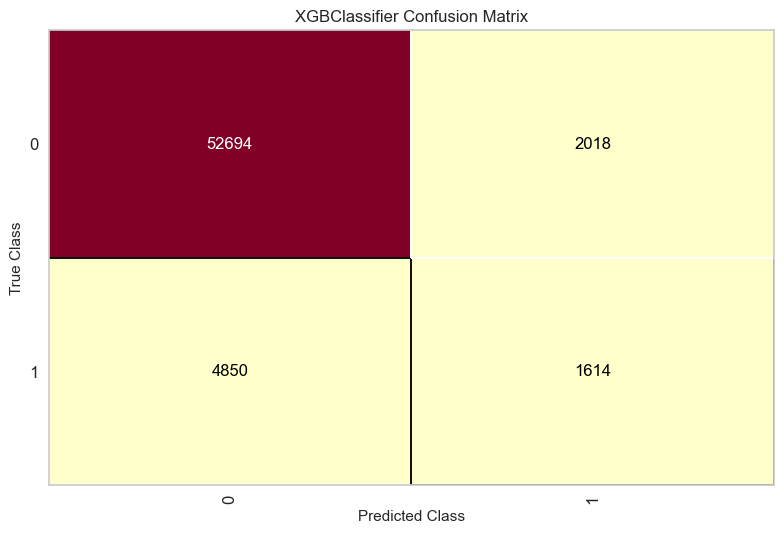

<AxesSubplot: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [132]:
from yellowbrick.classifier import ConfusionMatrix


cm = ConfusionMatrix(xgb)
cm.score(X_test, y_test)
cm.show()

In [133]:
def roi(odds, position, prediction):
    frame = {"oods": np.array(odds),
             "position" : np.array(position),
             "prediction":  np.array(prediction)}
    frame = pd.DataFrame(frame)
    frame = frame.drop(frame[frame["prediction"] != 1].index)
    bets = len(frame)
    frame2 = frame.drop(frame[frame["position"] != frame["prediction"]].index)
    returns = frame2["oods"].sum()
    return returns - bets, bets, frame

In [134]:
testOdds = X_test["DecOdds"]
returns, bets, frame = roi(testOdds, y_test, y_pred)
print(returns, bets)

-215.57000000000016 3632


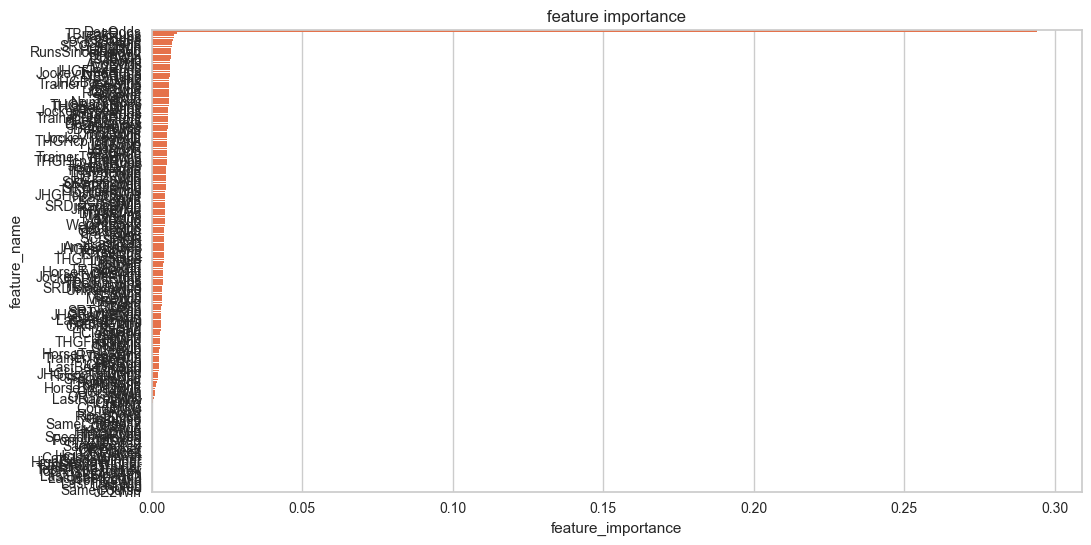

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(12, 6))
df_plt = pd.DataFrame({'feature_name': X_train.columns, 'feature_importance': xgb.feature_importances_})
df_plt.sort_values('feature_importance', ascending=False, inplace=True)
sns.barplot(x="feature_importance", y="feature_name", data=df_plt,color='#FF6631')
plt.title('feature importance')
plt.show()

In [103]:
liveDF = pd.read_excel("latest.xlsx")
print(liveDF.shape)
liveDF = clean_df(liveDF)
print(liveDF.shape)

(720, 205)
(720, 205)


0              0
1              1
2              2
3              3
4              4
           ...  
244699    244699
244700    244700
244701    244701
244702    244702
244703    244703
Name: Unnamed: 0, Length: 244704, dtype: int64


In [135]:
xInput, yInput = liveDF.iloc[:, :-1], liveDF.iloc[:, -1]
xInput = xInput.drop("Vibes", axis = "columns")
preds = xgb.predict(xInput)
returns, bets, frame = roi(xInput["DecOdds"], yInput, preds)

In [138]:
print(returns, bets, frame)
print(frame)

8.380000000000003 32      oods  position  prediction
0    1.80         0           1
61   2.75         1           1
71   2.88         0           1
74   1.83         1           1
82   2.25         0           1
110  2.00         1           1
120  1.44         1           1
123  2.63         0           1
127  1.33         1           1
160  2.63         1           1
170  2.50         1           1
187  2.38         1           1
188  2.25         0           1
253  1.91         1           1
305  2.38         1           1
311  1.53         1           1
319  2.25         0           1
327  1.33         1           1
415  2.25         1           1
430  2.50         0           1
449  1.57         1           1
455  1.80         1           1
471  2.75         1           1
474  2.38         0           1
495  2.50         0           1
555  2.75         0           1
589  2.50         1           1
618  1.83         1           1
678  2.00         1           1
682  2.88         0